In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## This notebook is used to plot histograms when the workflow is too large to download from CSF3
## The data is needed to be export from HDF5 output

In [2]:
with open('uni_strain_random_cube.txt', 'r') as file:
    lines = file.readlines()

data = [line.strip().split()[1] for line in lines]# create DataFrame
df_1 = pd.DataFrame(data, columns=['data']) # save data to dataframe
df_1['data'] = df_1['data'].str.rstrip(',')
df_1.dtypes # output the file type

data    object
dtype: object

In [3]:
df_1 = df_1.astype(float) # floatten data

In [4]:
# reshape data
with open('uni_strain_EBSD_cube.txt', 'r') as file:
    lines = file.readlines()

data = [line.strip().split()[1] for line in lines]
df_2 = pd.DataFrame(data, columns=['data'])
df_2['data'] = df_2['data'].str.rstrip(',')
df_2.dtypes

data    object
dtype: object

In [5]:
df_2 = df_2.astype(float)

In [7]:
with open('plane_strain_random_data.txt', 'r') as file:
    lines = file.readlines()

data = [line.strip().split()[1] for line in lines]
df_3 = pd.DataFrame(data, columns=['data'])
df_3['data'] = df_3['data'].str.rstrip(',')
df_3.dtypes

data    object
dtype: object

In [8]:
df_3 = df_3.astype(float)

In [9]:
with open('plane_strain_EBSD_data.txt', 'r') as file:
    lines = file.readlines()

data = [line.strip().split()[1] for line in lines]
df_4 = pd.DataFrame(data, columns=['data'])
df_4['data'] = df_4['data'].str.rstrip(',')
df_4.dtypes

data    object
dtype: object

In [10]:
df_4 = df_4.astype(float)

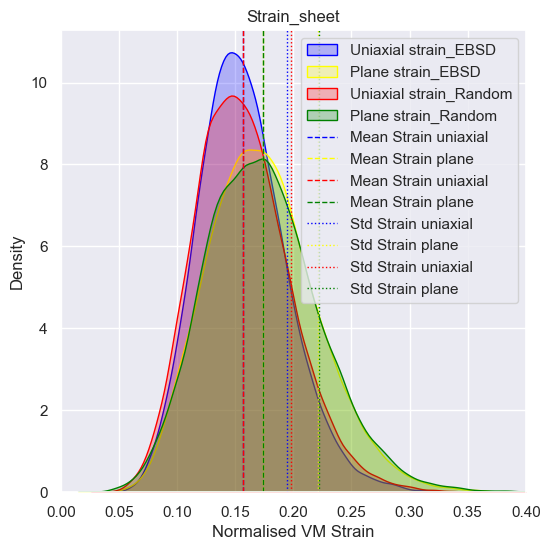

In [13]:
# read the data
norm_strain_uni1 = df_1['data']
norm_strain_uni2 = df_2['data']
norm_strain_uni3 = df_3['data']
norm_strain_uni4 = df_4['data']

# set fig style
sns.set(style="darkgrid")

# plot the data and set the size
plt.figure(figsize=(6, 6))

# plot the normalised histogram
sns.kdeplot(norm_strain_uni1, color='blue', fill=True, label='Uniaxial strain_Random')
sns.kdeplot(norm_strain_uni2, color='yellow', fill=True, label='Uniaxial strain_EBSD')
sns.kdeplot(norm_strain_uni3, color='red', fill=True, label='Plane strain_Random')
sns.kdeplot(norm_strain_uni4, color='green', fill=True, label='Plane strain_EBSD')

# add title and legend
plt.title('Strain_sheet')
plt.legend()

# add label 
plt.xlabel('Normalised VM Strain')
plt.ylabel('Density')

# set the range of X-Axis
plt.xlim(0, 0.4)

# add the polylines
plt.axvline(norm_strain_uni1.mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean Strain uniaxial')
plt.axvline(norm_strain_uni2.mean(), color='yellow', linestyle='dashed', linewidth=1, label='Mean Strain uniaxial')
plt.axvline(norm_strain_uni3.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Strain plane')
plt.axvline(norm_strain_uni4.mean(), color='green', linestyle='dashed', linewidth=1, label='Mean Strain plane')

plt.axvline(norm_strain_uni1.mean() + norm_strain_uni1.std(), color='blue', linestyle='dotted', linewidth=1, label='Std Strain uniaxial')
plt.axvline(norm_strain_uni2.mean() + norm_strain_uni2.std(), color='yellow', linestyle='dotted', linewidth=1, label='Std Strain uniaxial')
plt.axvline(norm_strain_uni3.mean() + norm_strain_uni3.std(), color='red', linestyle='dotted', linewidth=1, label='Std Strain plane')
plt.axvline(norm_strain_uni4.mean() + norm_strain_uni4.std(), color='green', linestyle='dotted', linewidth=1, label='Std Strain plane')

# add legend
plt.legend()

# save to png
plt.savefig('full_com_strain_1.png', bbox_inches='tight')

plt.show()

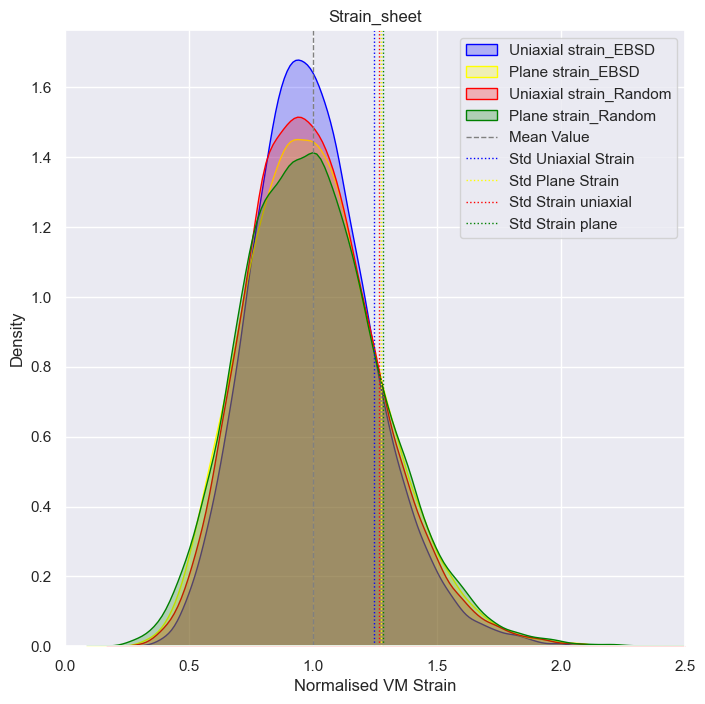

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# read the data by mean value
norm_strain_uni1 = df_1['data'].astype(float) / df_1['data'].astype(float).mean()
norm_strain_uni2 = df_2['data'].astype(float) / df_2['data'].astype(float).mean()
norm_strain_uni3 = df_3['data'].astype(float) / df_3['data'].astype(float).mean()
norm_strain_uni4 = df_4['data'].astype(float) / df_4['data'].astype(float).mean()

# set fig style
sns.set(style="darkgrid")

# plot the data and set the size
plt.figure(figsize=(8, 8))

# plot the normalised histogram
sns.kdeplot(norm_strain_uni1, color='blue', fill=True, label='Uniaxial strain_Random')
sns.kdeplot(norm_strain_uni2, color='yellow', fill=True, label='Uniaxial strain_EBSD')
sns.kdeplot(norm_strain_uni3, color='red', fill=True, label='Plane strain_Random')
sns.kdeplot(norm_strain_uni4, color='green', fill=True, label='Plane strain_EBSD')

# add title and legend
plt.title('Strain_sheet')
plt.legend()

# add label 
plt.xlabel('Normalised VM Strain')
plt.ylabel('Density')

# set the range of X-Axis
plt.xlim(0, 2.5)

# add the polylines
plt.axvline(norm_strain_uni1.mean(), color='grey', linestyle='dashed', linewidth=1, label='Mean Value')

plt.axvline(norm_strain_uni1.mean() + norm_strain_uni1.std(), color='blue', linestyle='dotted', linewidth=1, label='Std Uniaxial Strain')
plt.axvline(norm_strain_uni2.mean() + norm_strain_uni2.std(), color='yellow', linestyle='dotted', linewidth=1, label='Std Uniaxial Strain')
plt.axvline(norm_strain_uni3.mean() + norm_strain_uni3.std(), color='red', linestyle='dotted', linewidth=1, label='Std Strain plane')
plt.axvline(norm_strain_uni4.mean() + norm_strain_uni4.std(), color='green', linestyle='dotted', linewidth=1, label='Std Strain plane')

# add legend
plt.legend()

# save to png
plt.savefig('full_com_strain_2.png', bbox_inches='tight')

plt.show()